# Import Data from database

In [1]:
import mysql.connector
import pandas as pd
import config
import datetime
import matplotlib.pyplot as plt

In [2]:
mydb = mysql.connector.connect(
    host=config.URL,
    user=config.USER,
    password=config.PASSWORD,
    database=config.DB,
    port=config.PORT
)
mycursor = mydb.cursor()

In [3]:
mycursor.execute('SELECT * FROM dbike.station')
station_data =  mycursor.fetchall()

In [4]:
mycursor.execute('SELECT * FROM dbike.availability')
availability_data =  mycursor.fetchall()

In [5]:
mycursor.execute('SELECT * FROM dbike.weather')
weather_data =  mycursor.fetchall()

In [6]:
# create dataframes from the fetched data
station_df = pd.DataFrame(station_data, columns=['number',  'address','banking','bike_stands','name','position_lat', 'position_lng','available_bikes'])
availability_df = pd.DataFrame(availability_data, columns=['number', 'last_update', 'available_bikes', 'available_bike_stands', 'status', 'timestamp'])
weather_df = pd.DataFrame(weather_data, columns = ['time','main_weather','visibility','wind_speed', 'temp', 'humidity'])

In [7]:
station_df['number'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117])

In [8]:
# Drop the 'available_bikes' column from the station_df dataframe
station_df = station_df.drop('available_bikes', axis=1)

In [9]:
# merge station_df and availability_df on 'number' column
merged_df = pd.merge(station_df, availability_df, on='number')

In [10]:
# Extract the hour of the day and day of the week from the timestamp column
merged_df['hour_of_day'] = merged_df['timestamp'].dt.hour
merged_df['date'] = merged_df['timestamp'].dt.date
merged_df.head(5)

,number,address,banking,bike_stands,name,position_lat,position_lng,last_update,available_bikes,available_bike_stands,status,timestamp,hour_of_day,date
0,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677602646,18,13,open,2023-02-28 16:44:06,16,2023-02-28
1,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677605889,15,16,open,2023-02-28 17:38:09,17,2023-02-28
2,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677606152,14,17,open,2023-02-28 17:42:32,17,2023-02-28
3,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677606562,15,16,open,2023-02-28 17:49:22,17,2023-02-28
4,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677607180,15,16,open,2023-02-28 17:59:40,17,2023-02-28


In [11]:
# Convert date and hour columns to datetime objects
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['hour_of_day'] = pd.to_timedelta(merged_df['hour_of_day'], unit='h')
# Combine date and time columns into a single datetime column
merged_df['datetime'] = merged_df.apply(lambda row: datetime.datetime.combine(row['date'], datetime.time(row['hour_of_day'].components.hours)), axis=1)
merged_df = merged_df.drop('hour_of_day', axis=1)
merged_df = merged_df.drop('date', axis=1)
merged_df.head(5)

,number,address,banking,bike_stands,name,position_lat,position_lng,last_update,available_bikes,available_bike_stands,status,timestamp,datetime
0,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677602646,18,13,open,2023-02-28 16:44:06,2023-02-28 16:00:00
1,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677605889,15,16,open,2023-02-28 17:38:09,2023-02-28 17:00:00
2,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677606152,14,17,open,2023-02-28 17:42:32,2023-02-28 17:00:00
3,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677606562,15,16,open,2023-02-28 17:49:22,2023-02-28 17:00:00
4,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.2625,1677607180,15,16,open,2023-02-28 17:59:40,2023-02-28 17:00:00


In [12]:
weather_df.head(5)

,time,main_weather,visibility,wind_speed,temp,humidity
0,1675209600,Clouds,10000,10.00,279.90,79
1,1675213200,Clouds,10000,9.26,279.89,80
2,1675216800,Clouds,10000,9.00,280.07,81
3,1675220400,Clouds,10000,9.26,280.11,81
4,1675224000,Clouds,10000,10.00,279.91,81


In [13]:
weather_df['timestamp'] = pd.to_datetime(weather_df['time'], unit='s')
weather_df

,time,main_weather,visibility,wind_speed,temp,humidity,timestamp
0,1675209600,Clouds,10000,10.00,279.90,79,2023-02-01 00:00:00
1,1675213200,Clouds,10000,9.26,279.89,80,2023-02-01 01:00:00
2,1675216800,Clouds,10000,9.00,280.07,81,2023-02-01 02:00:00
3,1675220400,Clouds,10000,9.26,280.11,81,2023-02-01 03:00:00
4,1675224000,Clouds,10000,10.00,279.91,81,2023-02-01 04:00:00
...,...,...,...,...,...,...,...
1706,1681137957,Clouds,10000,8.23,9.76,78,2023-04-10 14:45:57
1707,1681141557,Clouds,10000,8.75,10.53,73,2023-04-10 15:45:57
1708,1681145157,Rain,10000,12.86,9.04,75,2023-04-10 16:45:57
1709,1681665644,Clouds,10000,4.63,15.24,81,2023-04-16 17:20:44


In [14]:
# Extract the hour of the day and day of the week from the datetime column
weather_df['hour_of_day'] = weather_df['timestamp'].dt.hour
weather_df['date'] = weather_df['timestamp'].dt.date
weather_df.head(5)

,time,main_weather,visibility,wind_speed,temp,humidity,timestamp,hour_of_day,date
0,1675209600,Clouds,10000,10.00,279.90,79,2023-02-01 00:00:00,0,2023-02-01
1,1675213200,Clouds,10000,9.26,279.89,80,2023-02-01 01:00:00,1,2023-02-01
2,1675216800,Clouds,10000,9.00,280.07,81,2023-02-01 02:00:00,2,2023-02-01
3,1675220400,Clouds,10000,9.26,280.11,81,2023-02-01 03:00:00,3,2023-02-01
4,1675224000,Clouds,10000,10.00,279.91,81,2023-02-01 04:00:00,4,2023-02-01


In [15]:
# Convert date and hour columns to datetime objects
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['hour_of_day'] = pd.to_timedelta(weather_df['hour_of_day'], unit='h')

# Combine date and time columns into a single datetime column
weather_df['datetime'] = weather_df.apply(lambda row: datetime.datetime.combine(row['date'], datetime.time(row['hour_of_day'].components.hours)), axis=1)
weather_df = weather_df.drop('hour_of_day', axis=1)
weather_df = weather_df.drop('date', axis=1)
weather_df

,time,main_weather,visibility,wind_speed,temp,humidity,timestamp,datetime
0,1675209600,Clouds,10000,10.00,279.90,79,2023-02-01 00:00:00,2023-02-01 00:00:00
1,1675213200,Clouds,10000,9.26,279.89,80,2023-02-01 01:00:00,2023-02-01 01:00:00
2,1675216800,Clouds,10000,9.00,280.07,81,2023-02-01 02:00:00,2023-02-01 02:00:00
3,1675220400,Clouds,10000,9.26,280.11,81,2023-02-01 03:00:00,2023-02-01 03:00:00
4,1675224000,Clouds,10000,10.00,279.91,81,2023-02-01 04:00:00,2023-02-01 04:00:00
...,...,...,...,...,...,...,...,...
1706,1681137957,Clouds,10000,8.23,9.76,78,2023-04-10 14:45:57,2023-04-10 14:00:00
1707,1681141557,Clouds,10000,8.75,10.53,73,2023-04-10 15:45:57,2023-04-10 15:00:00
1708,1681145157,Rain,10000,12.86,9.04,75,2023-04-10 16:45:57,2023-04-10 16:00:00
1709,1681665644,Clouds,10000,4.63,15.24,81,2023-04-16 17:20:44,2023-04-16 17:00:00


In [16]:
merged_df.shape

(325076, 13)

In [17]:
weather_df.shape

(1711, 8)

In [18]:
# Merge weather_df and merged_df on the 'datetime' column
df = pd.merge(merged_df, weather_df, on='datetime')
df

,number,address,banking,bike_stands,name,position_lat,position_lng,last_update,available_bikes,available_bike_stands,status,timestamp_x,datetime,time,main_weather,visibility,wind_speed,temp,humidity,timestamp_y
0,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.26250,1677602646,18,13,open,2023-02-28 16:44:06,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00
1,2,Blessington Street,0,20,BLESSINGTON STREET,53.3568,-6.26814,1677602376,9,11,open,2023-02-28 16:39:36,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00
2,3,Bolton Street,0,20,BOLTON STREET,53.3512,-6.26986,1677602787,9,11,open,2023-02-28 16:46:27,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00
3,4,Greek Street,0,20,GREEK STREET,53.3469,-6.27298,1677602403,2,18,open,2023-02-28 16:40:03,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00
4,5,Charlemont Street,0,40,CHARLEMONT PLACE,53.3307,-6.26018,1677602704,17,23,open,2023-02-28 16:45:04,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274820,82,Mount Brown,0,22,MOUNT BROWN,53.3416,-6.29719,1679454993,8,0,open,2023-03-22 03:16:33,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00
274821,83,Emmet Road,0,40,EMMET ROAD,53.3407,-6.30819,1679456404,22,18,open,2023-03-22 03:40:04,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00
274822,86,Parkgate Street,0,38,PARKGATE STREET,53.3480,-6.29180,1679454531,27,11,open,2023-03-22 03:08:51,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00
274823,92,Heuston Bridge (North),0,40,HEUSTON BRIDGE (NORTH),53.3478,-6.29243,1679457180,37,3,open,2023-03-22 03:53:00,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00


In [19]:
# check the inconsistencies
print(df.main_weather.unique())

['Clouds' 'Drizzle' 'Rain' 'Clear' 'Snow' 'Mist' 'Fog']


In [20]:
# correct inconsistencies
df.loc[df['main_weather'] == 'Clear', 'main_weather'] = 'Sunny'
df.loc[df['main_weather'] == 'Drizzle', 'main_weather'] = 'Rain'
df.loc[df['main_weather'] == 'Mist', 'main_weather'] = 'Foggy'
df.loc[df['main_weather'] == 'Fog', 'main_weather'] = 'Foggy'

In [21]:
df['is_rainy'] = df['main_weather'].apply(lambda x: 1 if 'rain' in x.lower() else 0)

In [22]:
df

,number,address,banking,bike_stands,name,position_lat,position_lng,last_update,available_bikes,available_bike_stands,...,timestamp_x,datetime,time,main_weather,visibility,wind_speed,temp,humidity,timestamp_y,is_rainy
0,1,Clarendon Row,0,31,CLARENDON ROW,53.3409,-6.26250,1677602646,18,13,...,2023-02-28 16:44:06,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00,0
1,2,Blessington Street,0,20,BLESSINGTON STREET,53.3568,-6.26814,1677602376,9,11,...,2023-02-28 16:39:36,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00,0
2,3,Bolton Street,0,20,BOLTON STREET,53.3512,-6.26986,1677602787,9,11,...,2023-02-28 16:46:27,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00,0
3,4,Greek Street,0,20,GREEK STREET,53.3469,-6.27298,1677602403,2,18,...,2023-02-28 16:40:03,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00,0
4,5,Charlemont Street,0,40,CHARLEMONT PLACE,53.3307,-6.26018,1677602704,17,23,...,2023-02-28 16:45:04,2023-02-28 16:00:00,1677600000,Clouds,10000,6.17,279.69,74,2023-02-28 16:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274820,82,Mount Brown,0,22,MOUNT BROWN,53.3416,-6.29719,1679454993,8,0,...,2023-03-22 03:16:33,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00,1
274821,83,Emmet Road,0,40,EMMET ROAD,53.3407,-6.30819,1679456404,22,18,...,2023-03-22 03:40:04,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00,1
274822,86,Parkgate Street,0,38,PARKGATE STREET,53.3480,-6.29180,1679454531,27,11,...,2023-03-22 03:08:51,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00,1
274823,92,Heuston Bridge (North),0,40,HEUSTON BRIDGE (NORTH),53.3478,-6.29243,1679457180,37,3,...,2023-03-22 03:53:00,2023-03-22 03:00:00,1679454000,Rain,10000,11.83,281.56,69,2023-03-22 03:00:00,1


# Data cleaning

In [23]:
import numpy as np

In [24]:
# check for missing values
print(df.isna().sum())

number                   0
address                  0
banking                  0
bike_stands              0
name                     0
position_lat             0
position_lng             0
last_update              0
available_bikes          0
available_bike_stands    0
status                   0
timestamp_x              0
datetime                 0
time                     0
main_weather             0
visibility               0
wind_speed               0
temp                     0
humidity                 0
timestamp_y              0
is_rainy                 0
dtype: int64


After check missing values we know that there is no missing data

In [25]:
# check for duplicates
print(df.duplicated().sum())

0


There is no duplicate data 

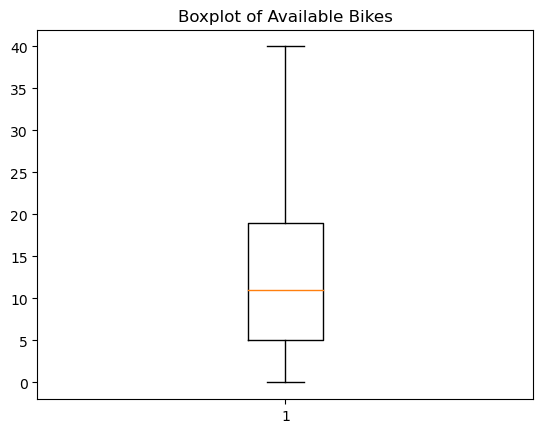

In [26]:
# Create a boxplot of the 'available_bikes' column, check for the outliner
fig, ax = plt.subplots()
ax.boxplot(df['available_bikes'])
ax.set_title('Boxplot of Available Bikes')
plt.show()

In [27]:
df.dtypes

number                            int64
address                          object
banking                           int64
bike_stands                       int64
name                             object
position_lat                    float64
position_lng                    float64
last_update                       int64
available_bikes                   int64
available_bike_stands             int64
status                           object
timestamp_x              datetime64[ns]
datetime                 datetime64[ns]
time                              int64
main_weather                     object
visibility                        int64
wind_speed                      float64
temp                            float64
humidity                          int64
timestamp_y              datetime64[ns]
is_rainy                          int64
dtype: object

# Plotting

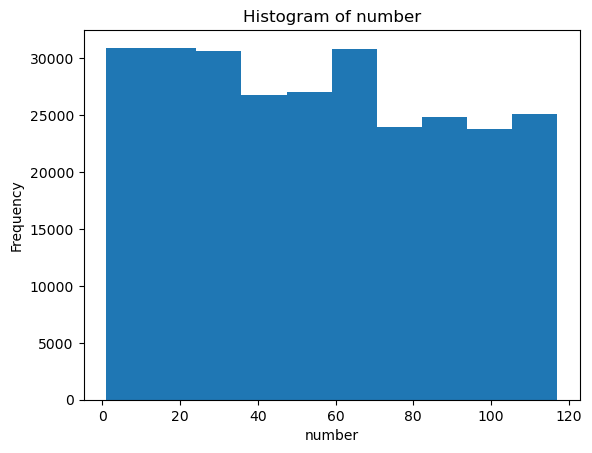

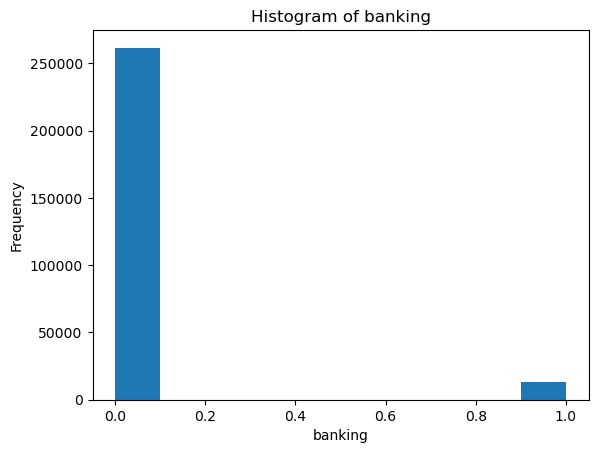

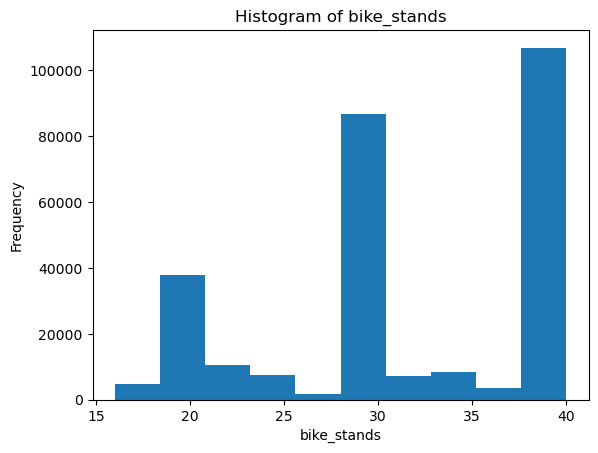

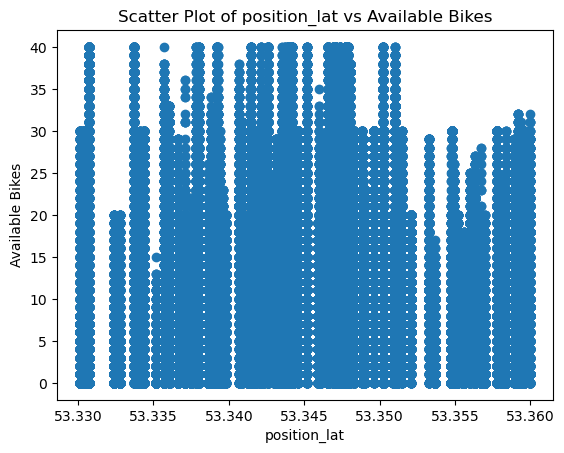

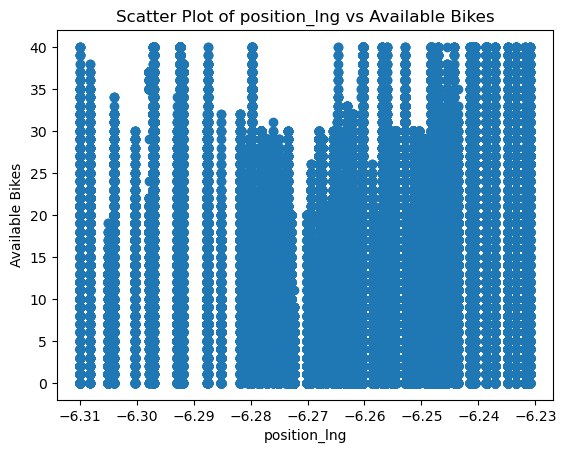

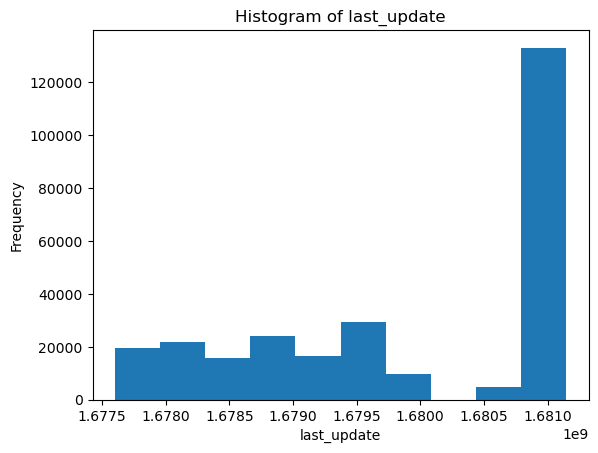

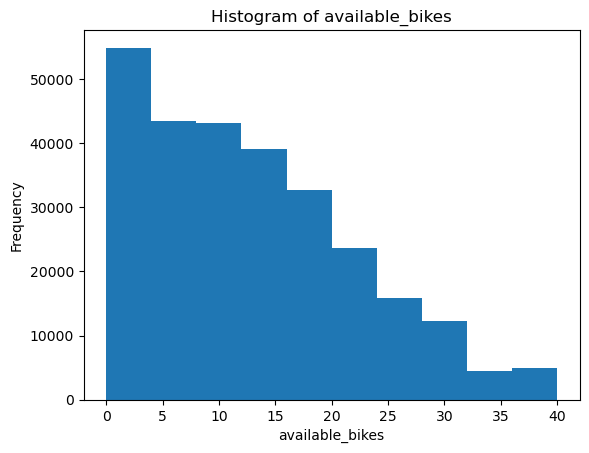

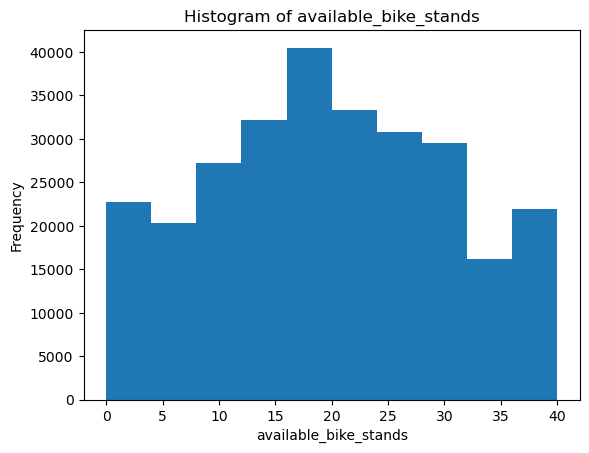

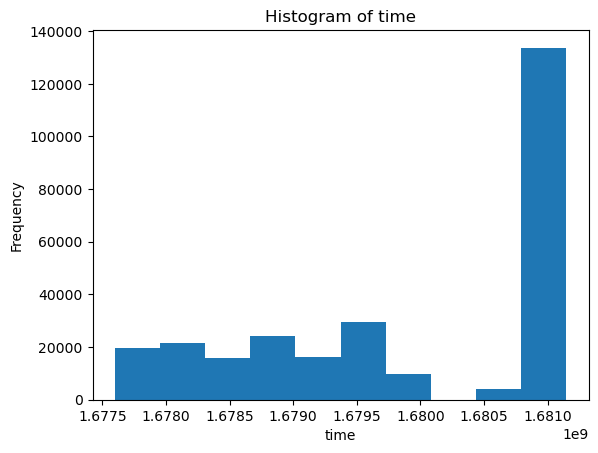

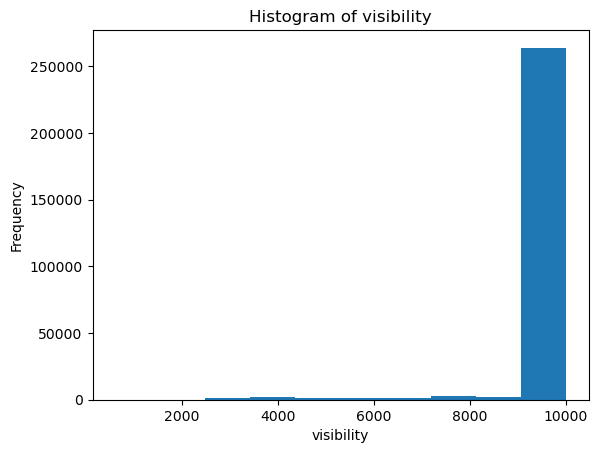

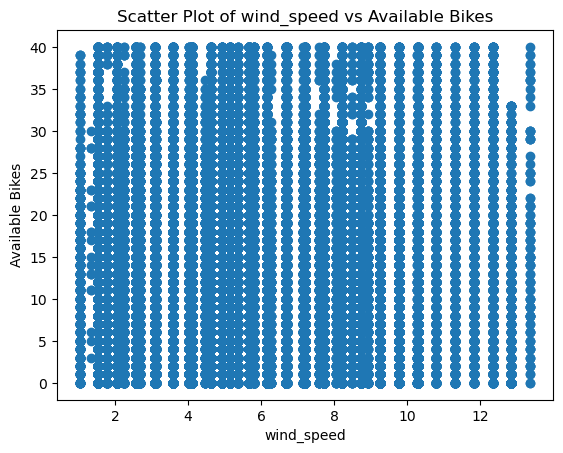

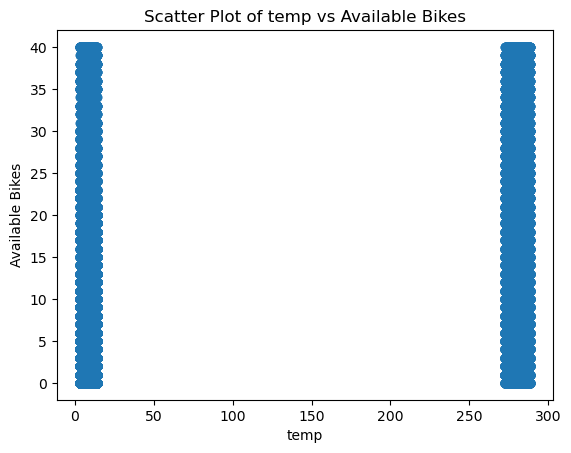

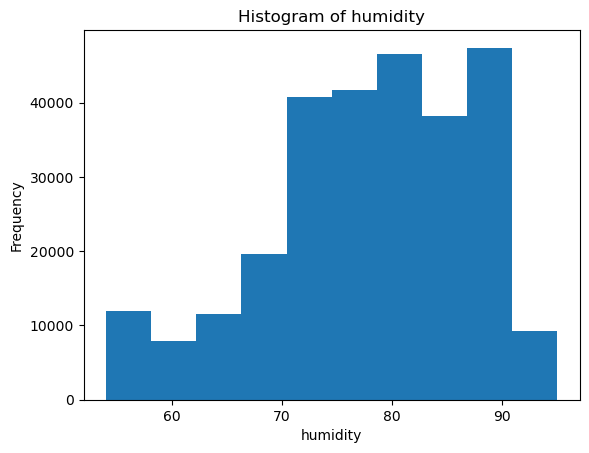

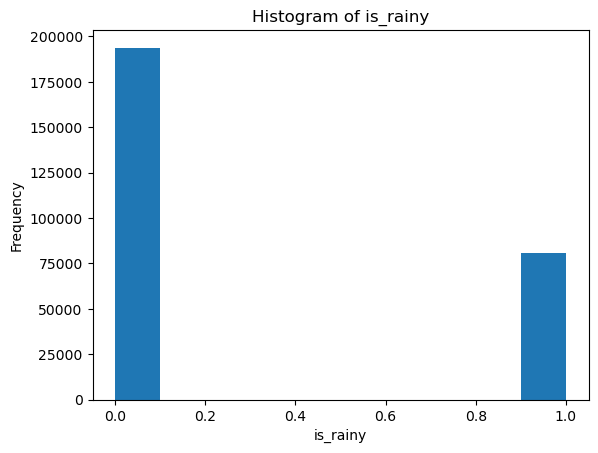

In [28]:
# Loop over each column in the dataframe
for col in df.columns:
    # Check the data type of the column
    if df[col].dtype == 'int64':
        # Create a histogram for integer columns
        fig, ax = plt.subplots()
        ax.hist(df[col])
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of {col}')
        plt.show()
    elif df[col].dtype == 'float64':
        # Create a scatter plot for float columns
        fig, ax = plt.subplots()
        ax.scatter(df[col], df['available_bikes'])
        ax.set_xlabel(col)
        ax.set_ylabel('Available Bikes')
        ax.set_title(f'Scatter Plot of {col} vs Available Bikes')
        plt.show()

# Correlation 

In [29]:
# Drop columns that are not useful for computing correlations
df_tem = df.drop(['number', 'banking'], axis=1)

# Compute the correlation matrix for numeric columns only
corr_matrix = df_tem.corr(numeric_only=True)

# Print the correlation matrix
print(corr_matrix)

                       bike_stands  position_lat  position_lng  last_update  \
bike_stands               1.000000     -0.091960      0.041801    -0.002158   
position_lat             -0.091960      1.000000     -0.115789     0.036965   
position_lng              0.041801     -0.115789      1.000000    -0.085468   
last_update              -0.002158      0.036965     -0.085468     1.000000   
available_bikes           0.231050      0.000945     -0.062250    -0.105923   
available_bike_stands     0.501016     -0.066485      0.076852     0.089199   
time                     -0.002155      0.036973     -0.085487     0.999999   
visibility                0.000902      0.000324     -0.013247     0.151926   
wind_speed               -0.001041     -0.010607      0.026054    -0.015319   
temp                      0.000327     -0.038538      0.091417    -0.904025   
humidity                  0.005174     -0.002903      0.005349    -0.091104   
is_rainy                 -0.001715     -0.021723    

The correlation coefficient between bike_stands and available_bikes is 0.231, which indicates a weak positive correlation between the number of bike stands and the number of available bikes. This suggests that stations with more bike stands tend to have more available bikes, although the correlation is not very strong.

Similarly, the coefficient between temp and last_update is -0.904, which indicates a strong negative correlation between the temperature and the time of the last update. This suggests that the temperature tends to decrease as time passes.

We can also see some positive correlations between available_bike_stands and bike_stands, as well as between available_bikes and is_rainy. On the other hand, we can see some negative correlations between available_bikes and available_bike_stands, as well as between temp and available_bike_stands.

Overall, the correlation matrix can help us identify potential patterns and relationships between the variables in the dataset, which can inform our analysis and modeling efforts.

# Machine Learning

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Feature engineering, add two new featuers: hour_of_day and day_of_week

In [31]:
# Extract the hour of the day and day of the week from the datetime column
df['hour_of_day'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
# Convert the day_of_week column to a set of dummy variables
day_of_week_dummies = pd.get_dummies(df['day_of_week'])
df = pd.concat([df, day_of_week_dummies], axis=1)

Split data into 80:20

In [32]:
# Prepare the data
X = df[['hour_of_day', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'is_rainy', 'number']]
y = df['available_bikes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model : Radom Forest

In [33]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)

# calculate the R-squared score, mean absolute error (MAE), and root mean squared error (RMSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared score: 0.723830614088862
Mean Absolute Error: 3.098203172179209
Root Mean Squared Error: 4.8443080762782715


# Model 2: Imporve Model

In [35]:
# Prepare the data
X = df[['hour_of_day','temp','wind_speed','humidity','visibility','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'is_rainy', 'number']]
y = df['available_bikes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Evaluate the model on the test data
# calculate the R-squared score, mean absolute error (MAE), and root mean squared error (RMSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared score: -0.7730399807306378
Mean Absolute Error: 9.805282495206638
Root Mean Squared Error: 12.315725111936922


In [38]:
import pickle
# Save the model to a file using pickle
with open('model.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

In [47]:
# Train the model with smaller min_samples_split
new_model = RandomForestRegressor(n_estimators=15, random_state=30, min_samples_split=3)  # Set min_samples_split to a smaller value
new_model.fit(X_train, y_train)

# calculate the R-squared score, mean absolute error (MAE), and root mean squared error (RMSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared score: 0.9542934400130978
Mean Absolute Error: 1.2669633701412681
Root Mean Squared Error: 2.259964493829182


In [40]:
# Save the model to a file using pickle
with open('new_model.pkl', 'wb') as handle:
    pickle.dump(new_model, handle, pickle.HIGHEST_PROTOCOL)

# Model for available_bike_stands

In [49]:
# Prepare the data
X = df[['hour_of_day','temp','wind_speed','humidity','visibility','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'is_rainy', 'number']]
y = df['available_bike_stands']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Train the model
model_bikeStands = RandomForestRegressor(n_estimators=100, random_state=42)
model_bikeStands.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# calculate the R-squared score, mean absolute error (MAE), and root mean squared error (RMSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared score: -0.9599540514874603
Mean Absolute Error: 12.003128491260478
Root Mean Squared Error: 14.760401120845748


In [52]:
import pickle
# Save the model to a file using pickle
with open('model.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

In [53]:
# Train the model with smaller min_samples_split
model_bikeStands = RandomForestRegressor(n_estimators=15, random_state=30, min_samples_split=3)  # Set min_samples_split to a smaller value
model_bikeStands.fit(X_train, y_train)

# calculate the R-squared score, mean absolute error (MAE), and root mean squared error (RMSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared score: -0.9599540514874603
Mean Absolute Error: 12.003128491260478
Root Mean Squared Error: 14.760401120845748


In [54]:
# Save the model to a file using pickle
with open('model_bikeStands.pkl', 'wb') as handle:
    pickle.dump(model_bikeStands, handle, pickle.HIGHEST_PROTOCOL)